In [253]:
import gensim.downloader as api
import matplotlib.pyplot as plt
import numpy as np
import nltk
import os
import pandas as pd
from pathlib import Path
import regex
import re
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from spacy.lang.en import English
import ssl

In [254]:
try:
     _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
     pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/gcm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import data

In [ ]:
# download from dropbox
!wget https://www.dropbox.com/s/fe7i4p6fw8qzrkl/twitter_data.csv?dl=0

In [255]:
# data_path = os.path.join(os.getcwd(), 'data/twitter_data.csv')
data_folder = Path("./")
data_path = data_folder / 'twitter_data.csv?dl=0'

In [256]:
twitter_df = pd.read_csv(data_path, encoding='latin-1', header=None, usecols=[0, 5])
twitter_df.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [257]:
# rename column "0" to "target"
twitter_df = twitter_df.rename(columns={0: 'target', 5: 'corpus'})

In [258]:
twitter_df.head()

,target,corpus
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [259]:
decode = {0: 'negative', 4: 'positive'}
def decode_sentiment(label):
	return decode[int(label)]

In [260]:
twitter_df['target'] = twitter_df['target'].apply(lambda x: decode_sentiment(x))

In [261]:
twitter_df.head()

,target,corpus
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,is upset that he can't update his Facebook by ...
2,negative,@Kenichan I dived many times for the ball. Man...
3,negative,my whole body feels itchy and like its on fire
4,negative,"@nationwideclass no, it's not behaving at all...."


In [262]:
twitter_df = twitter_df.dropna()
twitter_df.shape

(1600000, 2)

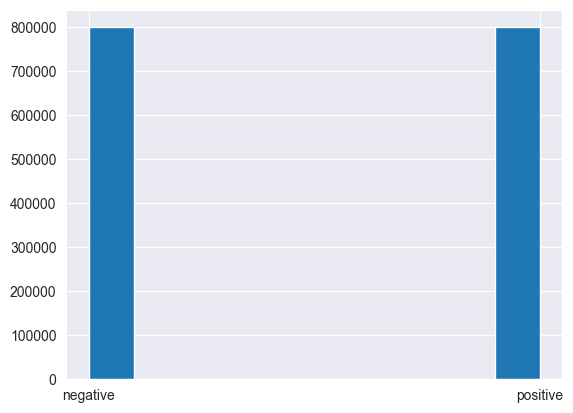

In [263]:
plt.hist(twitter_df["target"])
plt.show()

# Text Preprocessing

In [264]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def preprocess_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [265]:
preprocess_document(twitter_df["corpus"][800112])

'lou aww thanks'

In [266]:
twitter_df['corpus'][800112]

'@Lou911 Aww, thanks '

In [267]:
twitter_df['target'][800112]

'positive'

In [268]:
twitter_df['corpus_clean'] = twitter_df['corpus'].apply(preprocess_document)

In [269]:
twitter_df.head()

,target,corpus,corpus_clean
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccomyzl awww thats bummer...
1,negative,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,negative,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...
3,negative,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,negative,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see


In [270]:
df_corpus =  twitter_df['corpus_clean'].copy()

In [271]:
df_corpus.head()

0    switchfoot httptwitpiccomyzl awww thats bummer...
1    upset cant update facebook texting might cry r...
2    kenichan dived many times ball managed save re...
3                     whole body feels itchy like fire
4             nationwideclass behaving im mad cant see
Name: corpus_clean, dtype: object

In [272]:
normalize_corpus = np.vectorize(preprocess_document)

In [273]:
norm_twitter = normalize_corpus(df_corpus)

In [274]:
norm_twitter

array(['switchfoot httptwitpiccomyzl awww thats bummer shoulda got david carr third day',
       'upset cant update facebook texting might cry result school today also blah',
       'kenichan dived many times ball managed save rest go bounds', ...,
       'ready mojo makeover ask details',
       'happy th birthday boo alll time tupac amaru shakur',
       'happy charitytuesday thenspcc sparkscharity speakinguphh'],
      dtype='<U175')

In [275]:
from sklearn.feature_extraction.text import CountVectorizer

In [276]:
cv = CountVectorizer(min_df=0., max_df=1.)

# Create vector by passing the text corpus into the vectorizer to get back counts
cv_matrix = cv.fit_transform(norm_twitter)
cv_matrix

<1600000x790507 sparse matrix of type '<class 'numpy.int64'>'
	with 11928176 stored elements in Compressed Sparse Row format>

In [277]:
cv.vocabulary_

{'switchfoot': 679402,
 'httptwitpiccomyzl': 323468,
 'awww': 46586,
 'thats': 692463,
 'bummer': 88784,
 'shoulda': 635623,
 'got': 241082,
 'david': 147570,
 'carr': 98909,
 'third': 700485,
 'day': 148659,
 'upset': 735991,
 'cant': 96038,
 'update': 735289,
 'facebook': 200950,
 'texting': 690656,
 'might': 464804,
 'cry': 136491,
 'result': 594308,
 'school': 619370,
 'today': 709197,
 'also': 19692,
 'blah': 69960,
 'kenichan': 390119,
 'dived': 163898,
 'many': 444629,
 'times': 705570,
 'ball': 51472,
 'managed': 442968,
 'save': 617066,
 'rest': 594028,
 'go': 237347,
 'bounds': 78277,
 'whole': 759575,
 'body': 74412,
 'feels': 206548,
 'itchy': 349364,
 'like': 418955,
 'fire': 210539,
 'nationwideclass': 496942,
 'behaving': 59841,
 'im': 339233,
 'mad': 438536,
 'see': 623431,
 'kwesidei': 403704,
 'crew': 134825,
 'need': 498703,
 'hug': 330237,
 'loltrish': 427346,
 'hey': 263323,
 'long': 427837,
 'time': 705173,
 'yes': 781412,
 'rains': 582329,
 'bit': 68284,
 'lol': 

In [293]:
vocab = cv.get_feature_names_out()
print(len(vocab))
vocab

790507


array(['aa', 'aaa', 'aaaa', ..., 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'],
      dtype=object)

# Tokenization

In [279]:
# Disable all the annotators except the tokenizer so its fast
nlp = English(disable=['tagger', 'parser', 'ner'])

def tokenize(text):
  return [t.text.lower() for t in nlp(text)]

In [280]:
twitter_df['tokens'] = twitter_df['corpus_clean'].apply(tokenize)

In [281]:
twitter_df.head()

,target,corpus,corpus_clean,tokens
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccomyzl awww thats bummer...,"[switchfoot, httptwitpiccomyzl, awww, that, s,..."
1,negative,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,"[upset, ca, nt, update, facebook, texting, mig..."
2,negative,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...,"[kenichan, dived, many, times, ball, managed, ..."
3,negative,my whole body feels itchy and like its on fire,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]"
4,negative,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see,"[nationwideclass, behaving, i, m, mad, ca, nt,..."


# Fit the Word2Vec Model

In [282]:
from gensim.models import Word2Vec
# Set values for various parameters
feature_size =  100  # Word vector dimensionality
window_context = 5  # Context window size
min_word_count = 5  # Minimum word count

w2vmodel = Word2Vec(sentences=twitter_df['tokens'], size=feature_size, window=window_context, min_count=min_word_count, sg = 0)

### Similar words

In [283]:
w2vmodel.wv.most_similar('airport', topn=10)

[('heathrow', 0.743952751159668),
 ('lax', 0.739847719669342),
 ('sfo', 0.7057331800460815),
 ('ferry', 0.6918412446975708),
 ('plane', 0.6827521324157715),
 ('boarding', 0.68115234375),
 ('newark', 0.672397255897522),
 ('houston', 0.6663411855697632),
 ('taxi', 0.657442033290863),
 ('jfk', 0.6526827812194824)]

In [284]:
w2vmodel.wv.similarity('football', 'football')

0.99999994

In [285]:
similar_words = {
    search_term:
    [item[0] for item in w2vmodel.wv.most_similar([search_term], topn=5)]
    for search_term in ['white', 'good','toasty', 'red', 'wine', 'silky']
}
similar_words

{'white': ['black', 'purple', 'yellow', 'silver', 'neon'],
 'good': ['great', 'bad', 'goood', 'horrible', 'rough'],
 'toasty': ['cosy', 'snuggly', 'sunbut', 'breezes', 'fireplace'],
 'red': ['blue', 'yellow', 'orange', 'purple', 'white'],
 'wine': ['beer', 'vodka', 'tasting', 'champagne', 'pint'],
 'silky': ['frizzy', 'straightener', 'exfoliating', 'dyeing', 'pinkish']}

# Visualize embeddings

In [286]:
w2vmodel.wv.index2word[9800:12000]

['plugs',
 'chrishasboobs',
 'biased',
 'swimsuit',
 'locations',
 'yeaaa',
 'vince',
 'elizapatricia',
 'taiwan',
 'endlessblush',
 'indo',
 'hotwords',
 'thisgoeshere',
 'httptwitpiccomshtr',
 'puter',
 'activated',
 'legendary',
 'amberbenson',
 'frogs',
 'vb',
 'conflict',
 'natasha',
 'scratches',
 'reserved',
 'stfu',
 'lolim',
 'hmv',
 'maya',
 'waaa',
 'documents',
 'drowned',
 'pigeon',
 'proxy',
 'salary',
 'completly',
 'webcast',
 'hearted',
 'joints',
 'noi',
 'lu',
 'blech',
 'frequently',
 'chewed',
 'bsg',
 'ro',
 'tday',
 'limp',
 'rib',
 'mcrmuffin',
 'bla',
 'benny',
 'copied',
 'trailers',
 'pressing',
 'crutches',
 'hotmail',
 'edwards',
 'baha',
 'imaginary',
 'vans',
 'philadelphia',
 'locks',
 'dale',
 'spoilt',
 'brandi',
 'flicks',
 'mart',
 'sundae',
 'authors',
 'clutch',
 'confessions',
 'marked',
 'afterparty',
 'kp',
 'buggered',
 'jax',
 'kyleandjackieo',
 'sakit',
 'sporting',
 'dishwasher',
 'agen',
 'weirdo',
 'approx',
 'innout',
 'references',
 'phe

## TSNE: T-distributed Stochastic neighbor Embedding
* `n_components`: int default=2. Dimension of the embedded space.
* `random_state`: int, RandomState instance or None, default=None. Determines the random number generator. Pass an int for reproducible results across multiple function calls. Note that different initializations might result in different local minima of the cost function
* `n_iter`: int, default=None. The number of parallel jobs to run for neighbors search. This parameter has no impact when metric="precomputed" or (metric="euclidean" and method="exact"). None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
* `perplexity`: float, default=30.0. The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significantly different results. The perplexity must be less that the number of samples.

/Users/gcm/PyProjects/CLT/venv3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/gcm/PyProjects/CLT/venv3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


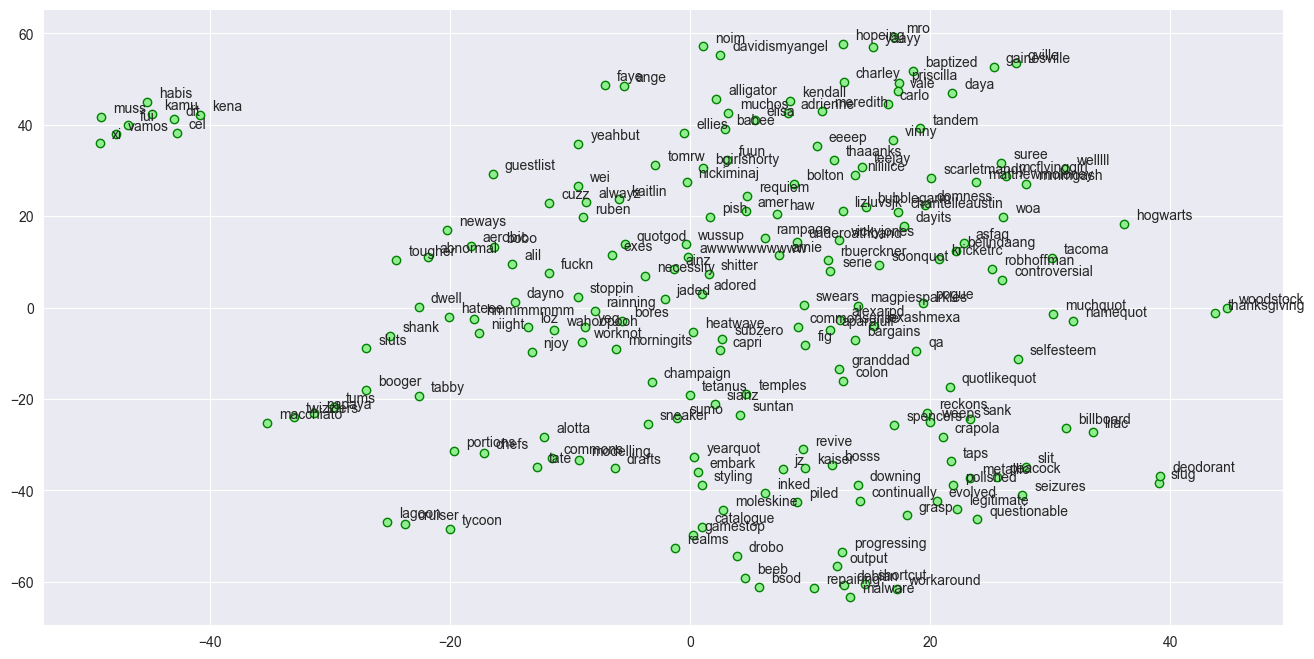

In [287]:
from sklearn.manifold import TSNE

words = w2vmodel.wv.index2word[19800:20000]      ## get the word forms of voculary sample
wvs = w2vmodel.wv[words]                     ## get embeddings of word forms

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(16, 8))
plt.scatter(T[:, 0], T[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label,
                 xy=(x + 1, y + 1),
                 xytext=(0, 0),
                 textcoords='offset points')

In [288]:
def display_closestwords_tsnescatterplot(model, word, size):

    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word, topn=100)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.figure(figsize=(15, 8))
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/var/folders/gf/mnrm20_51m9_99sdqvcn3bpw0000gn/T/ipykernel_16345/396226127.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  arr = np.append(arr, np.array([model[word]]), axis=0)
/var/folders/gf/mnrm20_51m9_99sdqvcn3bpw0000gn/T/ipykernel_16345/396226127.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  wrd_vector = model[wrd_score[0]]
/Users/gcm/PyProjects/CLT/venv3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/gcm/PyProjects/CLT/venv3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


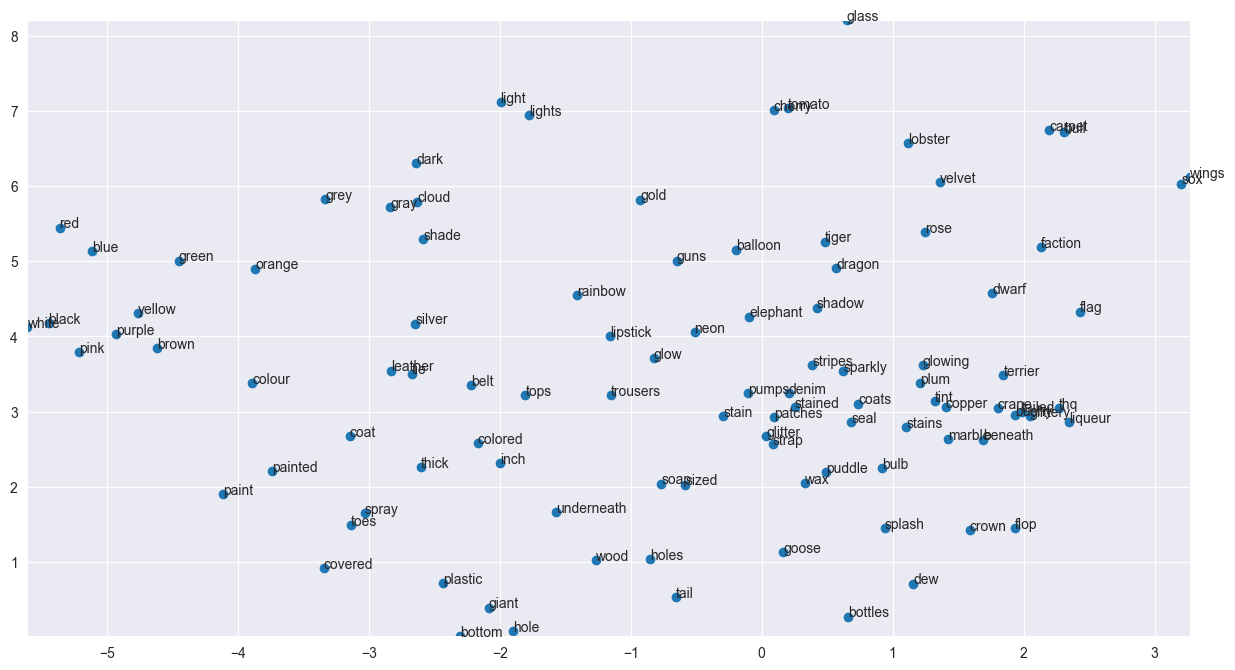

In [289]:
display_closestwords_tsnescatterplot(w2vmodel, 'red', 100)

# Pretrained word embeddings

In [290]:
import gensim.downloader as api

# Download the pretrained Glove embeddings. Try fasttext at home.

glove_vectors = api.load("glove-wiki-gigaword-100")

In [291]:
type(glove_vectors)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [292]:
glove_vectors.most_similar('airport')

[('airports', 0.7392043471336365),
 ('heathrow', 0.72101891040802),
 ('flights', 0.677689790725708),
 ('terminal', 0.6666516661643982),
 ('traffic', 0.6565655469894409),
 ('bus', 0.6475625038146973),
 ('station', 0.6416416168212891),
 ('flight', 0.6398976445198059),
 ('metro', 0.6340821385383606),
 ('transit', 0.6318755149841309)]

# Conclusion

In this exercise I have used a Twitter dataset containing 1.6 million tweets. It contains various columns for example the date of the tweet. However, for this exercise only the tweet itself (corpus) and the positivity (target) was used. Even though it is not a task of this exercise to perform a classification of the tweets, I prepared the dataset to do so.

An analysis of the token was performed after preprocessing the tweets and removing all the stop words. The dataset contains even after preprocessing around 790'000 individual tokens. A possible explanation for this huge amount of individual tokens could be that the tweets were written in different languages. Additionally, looking through the tokens, it can be seen that many words were written incorrectly, or in slang.
Since Twitter is a social plattform, were nobody cares about the correct spelling, it is not surprising the massive amount of tokens.
On top of that, nonsense words such as "aa", "aaa", "aaaa" up to countless "a" were found.
The stop word detection does not find these tokens.

This analysis would make more sense with text snippets in which a correct english is used.
Before starting to analysis tweets, a more effective data cleaning should be performed. A possibility would be to compare each token with an universal list of (english) tokens. If the token is recognized as correct word, it is kept in the list, otherwise it is removed.
However, even this method could lead to misinformation. Assuming, many people tweet about a person which is not added yet to the "universal list", so would the name of this person be removed and the analysis would lead to misinterpretation.

The visualization of the embeddings is a nice tool which works well for up to 250 tokens. Visualizing more than 250 tokens makes the entire figure unreadable and therefore unusable. For such a big dataset as I used in this analysis, does the visualisation just make little sense.
I thought about making separate dataframes for all words which starts with the same letter. However, this would make no sense since the "similarity" of the word is not about the way the word is written, but about the meaning of the word.
Therefore, I decided not to do it.